## ¿Quién cuida a quienes nos cuidaron? 
La población de Cuba se ha visto gravemente afectada por la compleja situación económica que está viviendo el país, especialmente los adultos mayores. Más del 25% de los cubanos tienen 60 años o más, una cifra que refleja el envejecimiento progresivo de la sociedad cubana. Este grupo es vulnerable y, por lo tanto, enfrenta grandes desafíos, debido a que la pensión mínima estatal ronda los 3056 cup, una cantidad que resulta insuficiente para cubrir las necesidades básicas en un contexto de alta inflación y fluctuación del dólar.

El 4 de marzo de 2022, Cubadebate publicó un artículo titulado "Más viejos, más vulnerables: Los achaques económicos del adulto mayor", escrito por: Roberto Alfonso Lara,Roxana Martínez Abreu, Luana Lobelle Muñiz, y Darline Shenandra Carbó Díaz. Esta noticia expuso la situación de los ancianos en Cienfuegos, resaltando su creciente invisibilidad social y la insuficiencia de las pensiones frente al costo de la vida. A través de testimonios y datos oficiales, se revela cómo la vejez en la isla está marcada por escasez, dependencia y lucha diaria por la subsistencia.

Actualmente, la economía en Cuba depende directamente del precio del dólar. Durante el 2025, el valor del dólar estadounidense(usd) en el mercado cubano ha variado de manera considerable, llegando a superar los 450 pesos cubanos por dólar, esto a su vez, generó que aumentaran los precios en productos y servicios, dificultando aún más las capacidades adquisitivas de los adultos mayores.

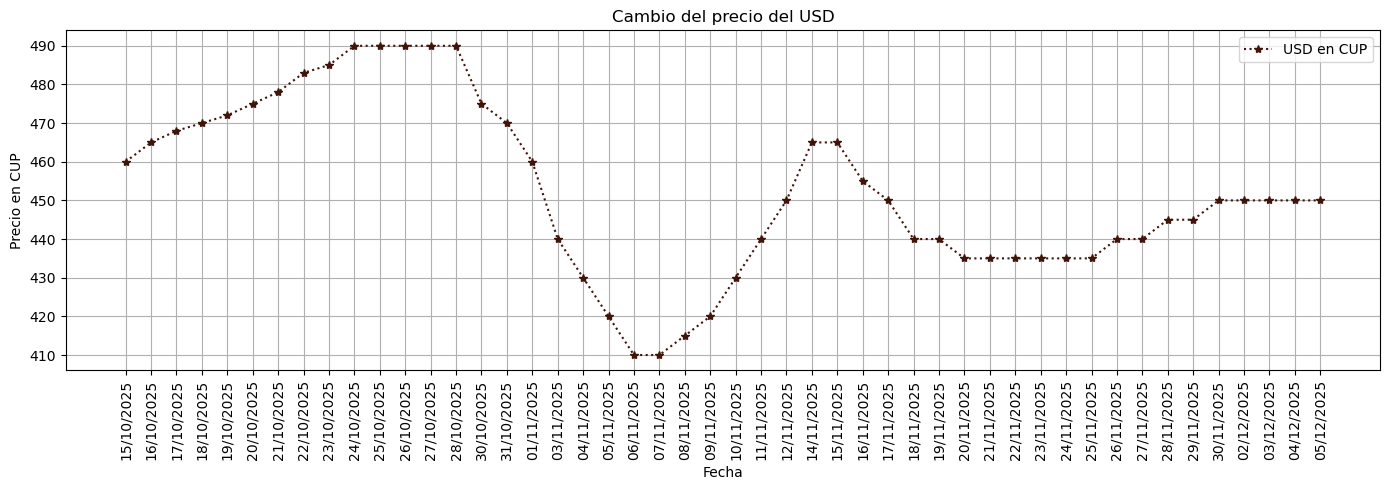

In [ ]:
import json
import matplotlib.pyplot as plt

def grafico_precio_usd(archivo_json):
    with open("precio_usd.json", "r", encoding="utf-8") as file:
        data = json.load(file)
    #Extrae los valores de precio
    precios = data["precio"]
    #Separa los valores de fecha y de precio
    dates = [item["fecha"] for item in precios]
    values_usd = [item["usd"] for item in precios]

    # Confección de la gráfica
    plt.figure(figsize=(14, 5))
    plt.plot(dates, values_usd, marker="*", linestyle=":", color="#401408", label="USD en CUP")
    plt.title("Cambio del precio del USD")
    plt.xlabel("Fecha")
    plt.ylabel("Precio en CUP")
    plt.xticks(rotation=90, ha ='right')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

grafico_precio_usd("precio_usd.json")

La mayoría de los cubanos realizaba sus compras en mercados estatales que vendían en moneda nacional (CUP), pero, a causa de la situación actual, estos mercados enfrentan una creciente escasez de productos básicos. Los consumidores se ven obligados a realizar sus compras en mercados particulares, los cuales cada día son más comunes para la población. La Oficina Nacional de Estadística e Información (ONEI) reportó en diciembre del 2025 que cantidad de establecimientos por tipo de mercado, en La Habana, era de: 83,31% particulares y 12,51% estatales; y Centro Habana de: 13.40% estatales y 81.23% particulares.

Aunque estos negocios se encargan de llenar el vacío que el mercado estatal no puede cubrir, siguen siendo inaccesibles para muchos. La mayoría de estos vendedores fija sus precios en función del dólar estadounidense (USD), dada la fuerte influencia de esta moneda en la economía cubana.

Los precios de muchos productos equivalen a más de la mitad de la pensión mínima. Esto dificulta a los ancianos la adquisición de productos básicos con los cuales puedan conformar una dieta sana, capaz de suplir sus necesidades.

“También están los ‘mandados’, la dieta, y no existe forma de que me alcance. He vendido casi todo lo que tenía de valor, y hay meses que ya no sé qué voy a hacer. Estoy sin ropa, sin zapatos, sin nada. Vivo —dijo— de la caridad de la gente, de lo que puedan darme, y no siento pena al decirlo”. - Cubadebate, 4 de marzo de 2022

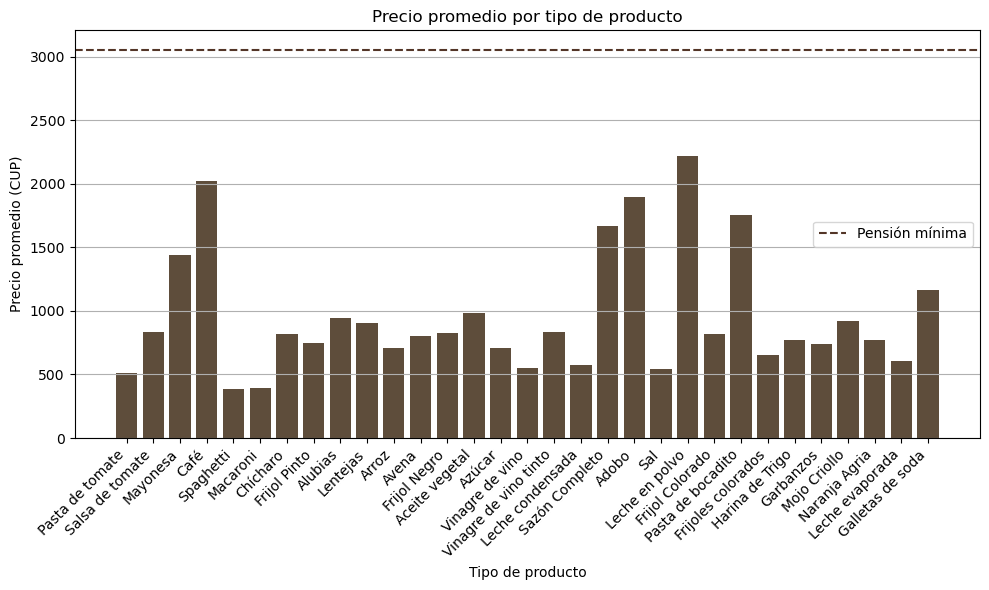

In [ ]:
import json
import matplotlib.pyplot as plt

def promedio_precios(ruta_archivo):
    with open("tiendas.json", "r", encoding="utf-8") as file:
        data = json.load(file)
    #Diccionario que recopila los valores necesarios
    dictionary = {} 
    #Extrae los valores necesarios para calcular el promedio
    if "stores" in data:
        for store in data["stores"]:
            if "products" in store:
                for product in store["products"]:
                    if "type" in product and "price" in product:
                        type = product["type"]
                        #Deja solo el valor numérico de price
                        price_str = product["price"].split()[0]  
                        # Convierte el precio en float
                        if price_str.isdigit():
                            price = float(price_str)
                            if type not in dictionary:
                                dictionary[type] = []
                            dictionary[type].append(price)
    #Calcula los promedios y los guarda en un diccionario
    prom = {}
    for type in dictionary:
        precios = dictionary[type]
        if len(precios) > 0:
            suma = 0
            for p in precios:
                suma += p
            prom[type] = suma / len(precios)

    return prom

def graficar_promedios(prom):
    keys = list(prom.keys())
    values = list(prom.values())

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color="#5e4d3b")
    plt.axhline(y=3056, color="#533527", ls="--", label="Pensión mínima")
    plt.title("Precio promedio por tipo de producto")
    plt.xlabel("Tipo de producto")
    plt.ylabel("Precio promedio (CUP)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

promedios = promedio_precios("tiendas.json")
graficar_promedios(promedios)

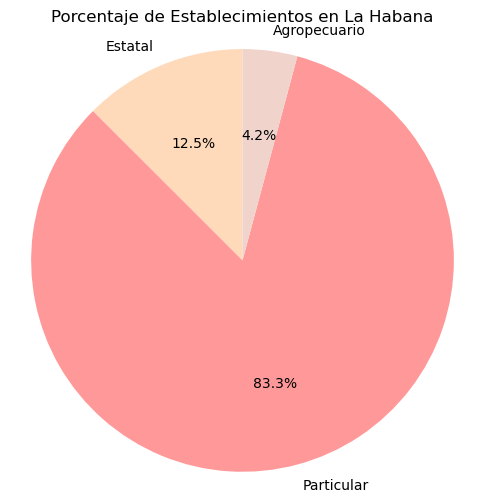

In [ ]:
import json
import matplotlib.pyplot as plt

def data_habana(archivo):
    with open(archivo, "r", encoding="utf-8") as f:
        datos = json.load(f)
    # Busca los datos de las categorías para La Habana
    for j in datos["Por ciento de establecimientos por región"]:
        if j["region"].lower() == "la habana":
            valores = [j["estatal"], j["particular"], j["agropecuario"]]  
            etiquetas = ["Estatal", "Particular", "Agropecuario"]
            return etiquetas, valores

def grafico_pie(etiquetas, valores):
    plt.figure(figsize=(6, 6))
    plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", startangle=90, colors=["#fedabb", "#ff9999", "#f0d4cb"])
    plt.title("Porcentaje de Establecimientos en La Habana")
    plt.axis("equal")
    plt.show()

etiquetas, valores = data_habana("porciento_mercados.json")
grafico_pie(etiquetas, valores)

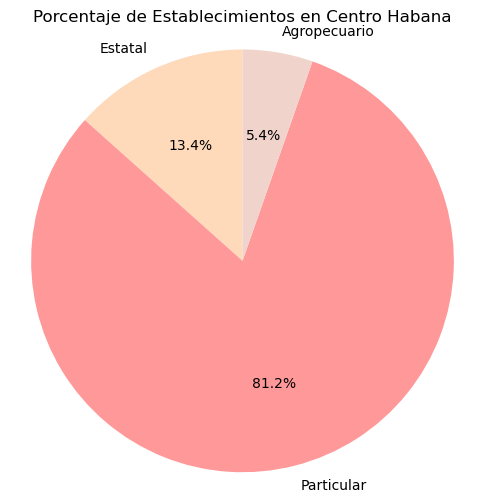

In [ ]:
import json
import matplotlib.pyplot as plt

def data_ch(archivo):
    with open(archivo, "r", encoding="utf-8") as f:
        datos = json.load(f)
    # Busca los datos de las categorías para Centro Habana
    for j in datos["Por ciento de establecimientos por región"]:
        if j["region"].lower() == "centro habana":
            valores = [j["estatal"], j["particular"], j["agropecuario"]]  
            etiquetas = ["Estatal", "Particular", "Agropecuario"]
            return etiquetas, valores

def grafico_pie(etiquetas, valores):
    plt.figure(figsize=(6, 6))
    plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", startangle=90, colors=["#fedabb", "#ff9999", "#f0d4cb"])
    plt.title("Porcentaje de Establecimientos en Centro Habana")
    plt.axis("equal")
    plt.show()

etiquetas, valores = data_ch("porciento_mercados.json")
grafico_pie(etiquetas, valores)

El crecimiento de la dolarización informal ha transformado totalmente la perspectiva de consumo en la isla. Muchos productos esenciales, desde alimentos hasta artículos de higiene, se comercializan en dólares o con precios en función a esta moneda, esto ha disparado su valor en el mercado. Esta realidad ha obligado al gobierno a intervenir, estableciendo topes de precios en algunos productos básicos con la intención de contener la inflación y proteger a los sectores más vulnerables de la población.

Sin embargo, en la práctica, estas medidas no siempre logran su cometido. Los controles de precios, aunque bien intencionados, a menudo se enfrentan a una oferta limitada, lo que genera desabastecimiento y mercados paralelos. Para muchos cubanos, especialmente los adultos mayores que dependen exclusivamente de pensiones fijas en moneda nacional, esta situación representa un gran desafío.

La escasez no solo afecta su alimentación, sino también su acceso a medicamentos, productos de higiene y otros bienes indispensables para una vida digna. En este contexto, la inflación no es solo una cifra económica: es una amenaza directa a su bienestar, su salud y su autonomía.

"Somos conscientes de que con los precios de hoy día, exorbitantes, la pensión mínima no satisface las necesidades de los jubilados”, admitió Lino Pérez Díaz, director provincial del Instituto Nacional de Seguridad Social (Inass) en Cienfuegos. - Cubadebate, 4 de marzo de 2022

### Productos básicos con precios topados                         

| Productos      | Unidad de medida | Precio |
|----------------|------------------|--------|
| Leche en polvo | 1 kg             | 1045   |
| Pastas alimenticias | 1 kg        | 835    |
| Pastas alimenticias | 500 g       | 417    |
| Aceite         | 1 l              | 900    |
| Aceite         | 900 ml           | 810    |
| Aceite         | 800 ml           | 720    |
| Aceite         | 700 ml           | 630    |

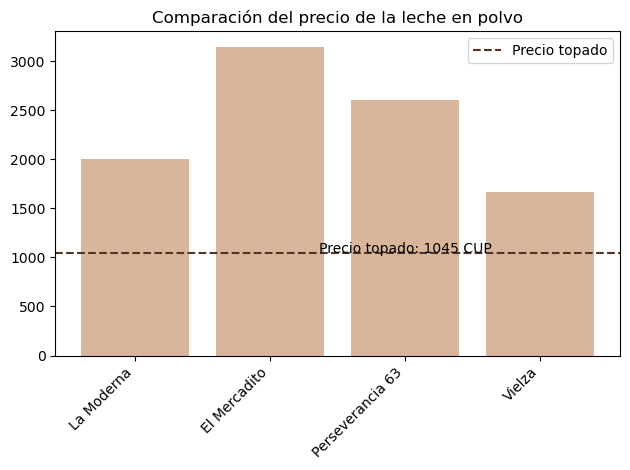

In [81]:
import json
import matplotlib.pyplot as plt

def leche_en_polvo(archive):
    with open("tiendas.json", "r", encoding="utf-8") as file:
        data = json.load(file)
    #Extrae los precios de la leche en polvo en las tiendas
    store_prices = []
    for store in data["stores"]:
        store_name = store["names"]
        for product in store["products"]:
            if product["type"] == "Leche en polvo" and product["net weight"] == "1 kg":
                price_str = product["price"].replace(" cup", "").strip()
                if price_str.isdigit():
                    store_prices.append((store_name, int(price_str)))
    return store_prices

def grafica_comp_leche(i):
    #Separa las tuplas en listas
    store_names = []
    for pair in leche_en_polvo("tiendas.json"):
        name = pair[0]
        store_names.append(name)
    prices = []
    for pair in leche_en_polvo("tiendas.json"):
        price = pair[1]
        prices.append(price)

    plt.bar(store_names, prices, color="#d9b59b")
    plt.axhline(y=1045, color="#533527", ls="--", label="Precio topado")
    plt.legend()
    plt.title("Comparación del precio de la leche en polvo")
    plt.xticks(rotation=45, ha="right")
    plt.annotate("Precio topado: 1045 CUP", xy=(len(store_names)//2, 1045), xytext=(len(store_names)//2, 1045), ha="center",)
    plt.tight_layout()
    plt.show()

grafica_comp_leche("tiendas.json")

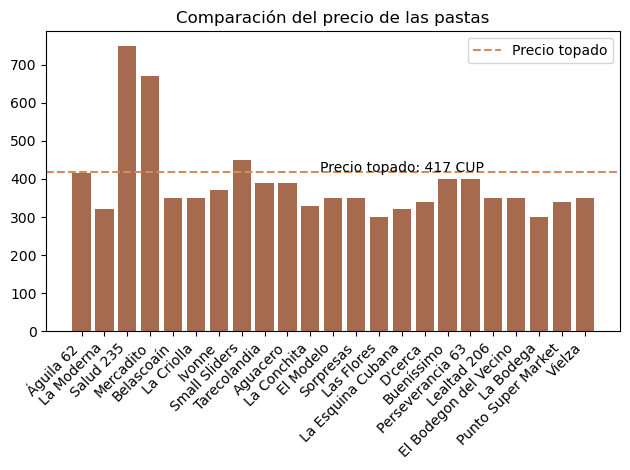

In [82]:
import json
import matplotlib.pyplot as plt

def spaghetti(archive):
    with open("tiendas.json", "r", encoding="utf-8") as file:
        data = json.load(file)
    #Extrae los precios del spaghetti en las tiendas 
    store_prices = []
    for store in data["stores"]:
        store_name = store["names"]
        for product in store["products"]:
            if product["type"] == "Spaghetti":
                price_str = product["price"].replace(" cup", "").strip()
                if price_str.isdigit():
                    store_prices.append((store_name, int(price_str)))
    return store_prices

def grafica_comp_spaghetti(i):
    #Separa las tuplas en listas
    store_names = []
    for pair in spaghetti("tiendas.json"):
        name = pair[0]
        store_names.append(name)
    prices = []
    for pair in spaghetti("tiendas.json"):
        price = pair[1]
        prices.append(price)

    plt.bar(store_names,prices,color="#a66a4e")
    plt.axhline(y=417, color="#d18d5c",ls="--",label="Precio topado")
    plt.legend()
    plt.annotate("Precio topado: 417 CUP", xy=(len(store_names)//2, 417), xytext=(len(store_names)//2, 417), ha="center",)
    plt.title("Comparación del precio de las pastas")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

grafica_comp_spaghetti("tiendas.json")

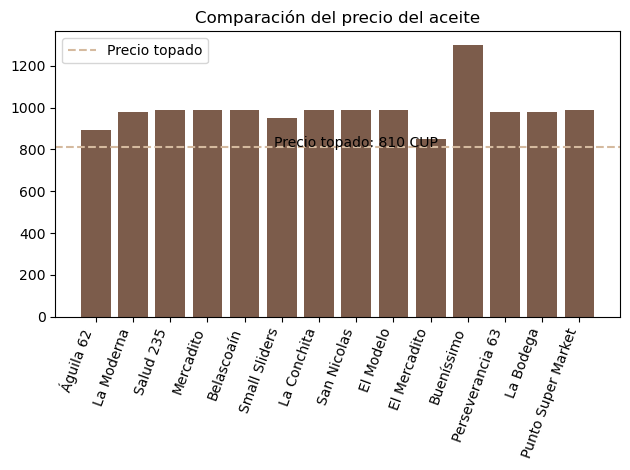

In [83]:
import json
import matplotlib.pyplot as plt

def aceite(archive):
    with open("tiendas.json", "r", encoding="utf-8") as file:
        data = json.load(file)
    #Extrae los precios del aceite en las tiendas
    store_prices = []
    for store in data["stores"]:
        store_name = store["names"]
        for product in store["products"]:
            if product["type"] == "Aceite vegetal":
                price_str = product["price"].replace(" cup", "").strip()
                if price_str.isdigit():
                    store_prices.append((store_name, int(price_str)))
    return store_prices

def grafica_comp_aceite(i):
    #Separa las tuplas en listas
    store_names = []
    for pair in aceite("tiendas.json"):
        name = pair[0]
        store_names.append(name)
    prices = []
    for pair in aceite("tiendas.json"):
        price = pair[1]
        prices.append(price)
    
    plt.bar(store_names,prices,color="#7c5c4b")
    plt.axhline(y=810,color="#d5ba9f",ls="--",label="Precio topado")
    plt.legend()
    plt.title("Comparación del precio del aceite")
    plt.annotate("Precio topado: 810 CUP", xy=(len(store_names)//2, 810), xytext=(len(store_names)//2, 810), ha="center",)
    plt.xticks(rotation=70, ha="right")
    plt.tight_layout()
    plt.show()

grafica_comp_aceite("tiendas.json")

Recientemente, han surgido muchas tiendas estatales que venden productos en dólares (USD), esta medida fue tomada por el Estado para obtener divisas, mejorando con esto la condición actual. Estas tiendas ofrecen una mayor variedad de alimentos y productos esenciales, sin embargo, sus precios son mucho más altos que los del mercado en moneda nacional, a causa de esto muchas personas no puedan acceder a ellos fácilmente. Los adultos mayores nuevamente son los más afectados, debido a que su mayoría depende únicamente de pensiones en pesos cubanos que no alcanzan para cubrir estos costos. Para ellos, conseguir alimentos básicos como leche, aceite o productos de higiene personal se vuelve casi imposible sin la ayuda económica de familiares, ya sea para hacer las compras o para proporcionar la moneda extranjera necesaria. Esta dependencia aumenta la vulnerabilidad de un grupo que ya enfrenta muchos retos en su día a día.

“Sumémosle a esto la enorme cantidad de ancianos que viven solos, un fenómeno agudizado en la última década”, añadió Olga Lourdes Vila Pérez, catedrática de la UCf y autora de varias investigaciones sobre el envejecimiento poblacional en el país. “Hablamos de adultos mayores abandonados por sus familias, e igual por los hijos y parientes cercanos que hoy emigran, lo cual hace que sean mucho más vulnerables”, subrayó. - Cubadebate, 4 de marzo de 2022 

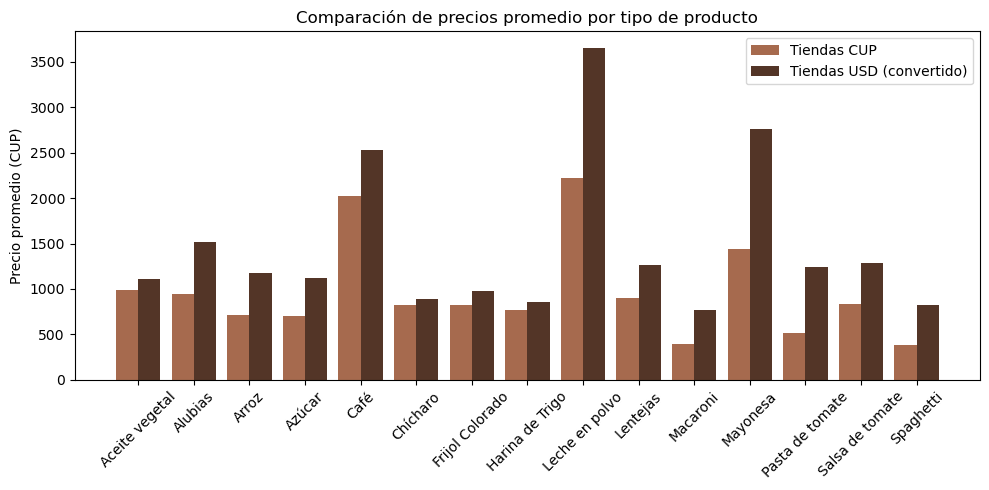

In [ ]:
import json
import matplotlib.pyplot as plt

def prom_usd(archive):
    with open("precio_usd.json", "r", encoding="utf-8") as f:
        data_precio = json.load(f)
    #Calcula el precio promedio del usd
    precios_usd = []
    for item in data_precio["precio"]:
        if "usd" in item and type(item["usd"]) in [int, float]:
            precios_usd.append(item["usd"])
    tasa_usd = sum(precios_usd) / len(precios_usd)
    return tasa_usd

def extraer_data_cup(archive):
    with open("tiendas.json", "r", encoding="utf-8") as f:
        data_cup = json.load(f)
    #Crea una lista con los productos de las tiendas
    productos_cup = []
    for tienda in data_cup["stores"]:
        for producto in tienda["products"]:
            precio_str = producto["price"]
            if "cup" in precio_str:
                precio = float(precio_str.replace("cup", "").strip())
                productos_cup.append({"tipo": producto["type"], "precio": precio})
    return productos_cup

def extraer_data_usd(archive):
    with open("tiendas_usd.json", "r", encoding="utf-8") as f:
        data_usd = json.load(f)
    #Crea una lista con los productos de las tiendas en usd
    productos_usd = []
    for tienda in data_usd["usd_stores"]:
        for producto in tienda["products"]:
            if type(producto["price"]) in [int, float]:
                precio = producto["price"] * prom_usd("precio_usd.json")
                productos_usd.append({"tipo": producto["type"], "precio": precio})
    return productos_usd

#Filtra los elementos de las listas para encontrar los productos en común
def comunes(i, j):
    global tipos_comunes, filtrados_cup, filtrados_usd
    #Busca los type de las tiendas en cup
    tipos_cup = []
    for p in productos_cup:
        if p["tipo"] not in tipos_cup:
            tipos_cup.append(p["tipo"])
    #Busca los type de las tiendas en usd
    tipos_usd = []
    for p in productos_usd:
        if p["tipo"] not in tipos_usd:
            tipos_usd.append(p["tipo"])
    #Crea una lista con los type en comun de ambas listas
    tipos_comunes = []
    for t in tipos_cup:
        if t in tipos_usd:
            tipos_comunes.append(t)
    # Filtra productos
    filtrados_cup = []
    for p in productos_cup:
        if p["tipo"] in tipos_comunes:
            filtrados_cup.append(p)

    filtrados_usd = []
    for p in productos_usd:
        if p["tipo"] in tipos_comunes:
            filtrados_usd.append(p)
    return tipos_comunes, filtrados_cup, filtrados_usd

#Calcula el prom de los precios de los productos de ambas lista
def calcular_prom(cup, usd):
    global prom_cup, prom_usd
    prom_cup = {}
    prom_usd = {}
    for tipo in tipos_comunes:
        #Tiendas en cup
        suma_cup = 0
        cantidad_cup = 0
        for p in cup:
            if p["tipo"] == tipo:
                suma_cup += p["precio"]
                cantidad_cup += 1
        if cantidad_cup > 0:
            prom_cup[tipo] = suma_cup / cantidad_cup
        #Tiendas en usd
        suma_usd = 0
        cantidad_usd = 0
        for p in usd:
            if p["tipo"] == tipo:
                suma_usd += p["precio"]
                cantidad_usd += 1
        if cantidad_usd > 0:
            prom_usd[tipo] = suma_usd / cantidad_usd

def grafica_comparacion(cup, usd):
    #Organiza las listas por producto en orden alfabético
    tipos_ordenados = sorted(tipos_comunes)
    valores_cup = [prom_cup[t] for t in tipos_ordenados]
    valores_usd = [prom_usd[t] for t in tipos_ordenados]
    #Compone el eje x por orden
    x = range(len(tipos_ordenados))
    ancho = 0.40 #tamaño de las barras

    plt.figure(figsize=(10, 5))
    plt.bar([i - ancho/2 for i in x], valores_cup, width=ancho, label="Tiendas CUP", color="#a66a4e")
    plt.bar([i + ancho/2 for i in x], valores_usd, width=ancho, label="Tiendas USD (convertido)", color="#533527")
    plt.xticks(x, tipos_ordenados, rotation=45)
    plt.ylabel("Precio promedio (CUP)")
    plt.title("Comparación de precios promedio por tipo de producto")
    plt.legend()
    plt.tight_layout()
    plt.show()

productos_cup = extraer_data_cup("tiendas.json")
productos_usd = extraer_data_usd("tiendas_usd.json")
tipos_comunes, filtrados_cup, filtrados_usd = comunes(productos_cup, productos_usd)
calcular_prom(filtrados_cup, filtrados_usd)
grafica_comparacion(prom_cup, prom_usd)

En el contexto económico de Cuba en 2025, los ancianos enfrentan una situación preocupante: la pensión mínima de 3056 CUP apenas alcanza para cubrir productos básicos en el mercado. Con un tipo de cambio informal que ronda los 450 CUP por dólar, esta pensión equivale a menos de 7 USD mensuales, esto limita drásticamente el acceso a tiendas que operan en divisas, en las cuales los precios son más estables pero inaccesibles para quienes no reciben remesas o ingresos en dólar. Incluso en tiendas que venden en moneda nacional, productos esenciales como el café, el aceite o la mayonesa pueden costar entre 1000 y 3000 CUP, consumiendo gran parte o incluso la totalidad de la pensión mensual.

Además, la estructura del comercio en Centro Habana está dominada por establecimientos particulares (81.23%), lo que sugiere una menor regulación de precios y una mayor exposición a la especulación, causada por la variación del USD. Esta realidad empeora si se tiene en cuneta la limitada infraestructura de apoyo social: apenas existen 35 casas de abuelos y 20 hogares de ancianos en toda La Habana, lo que resulta insuficiente para una población envejecida y vulnerable. En conjunto, estos factores crean un escenario en donde los jubilados tienen limitada capacida adquisitiva, poco respaldo por el estado y un mercado cada vez más dolarizado.
